# Internet Access in Indonesian Schools: Impact on Educational Equity

## Descriptive Analysis & Distribution

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("IndonesianSchool_InternetAccess_Data.csv", encoding="latin1", sep=";")  # Ensure correct encoding

# Preview
print(df.head())
print(df.info())

     Education Level        Province   Island  \
0  Elementary School            Aceh  Sumatra   
1  Elementary School  Sumatera Utara  Sumatra   
2  Elementary School  Sumatera Barat  Sumatra   
3  Elementary School            Riau  Sumatra   
4  Elementary School           Jambi  Sumatra   

   State-owned School with Internet  Private-owned School with Internet  \
0                              2188                                 156   
1                              5257                                1321   
2                              2599                                 272   
3                              2426                                 498   
4                              1742                                 136   

   Total Schools with Internet  Total State-owned Schools  \
0                         2344                       3335   
1                         6578                       8167   
2                         2871                       3892   
3         

### Mean, Median and Distribution

Average Schools with Internet: 928 Schools

Median Schools with Internet: 228 Schools

In [100]:
# Mean and median of schools with internet
mean_internet = df['Total Schools with Internet'].mean()
median_internet = df['Total Schools with Internet'].median()
distribution = df['Total Schools with Internet'].describe()

print("Average Schools with Internet:", mean_internet)
print(f"\nMedian Schools with Internet:", median_internet)
print(f"\nDistribution Schools with Internet:")
print(distribution)

Average Schools with Internet: 928.4631578947368

Median Schools with Internet: 228.5

Distribution Schools with Internet:
count      190.000000
mean       928.463158
std       2332.241578
min          0.000000
25%         67.000000
50%        228.500000
75%        798.250000
max      17398.000000
Name: Total Schools with Internet, dtype: float64


### Total schools with vs. without internet

Average schools without internet: 19.92087292697908 %

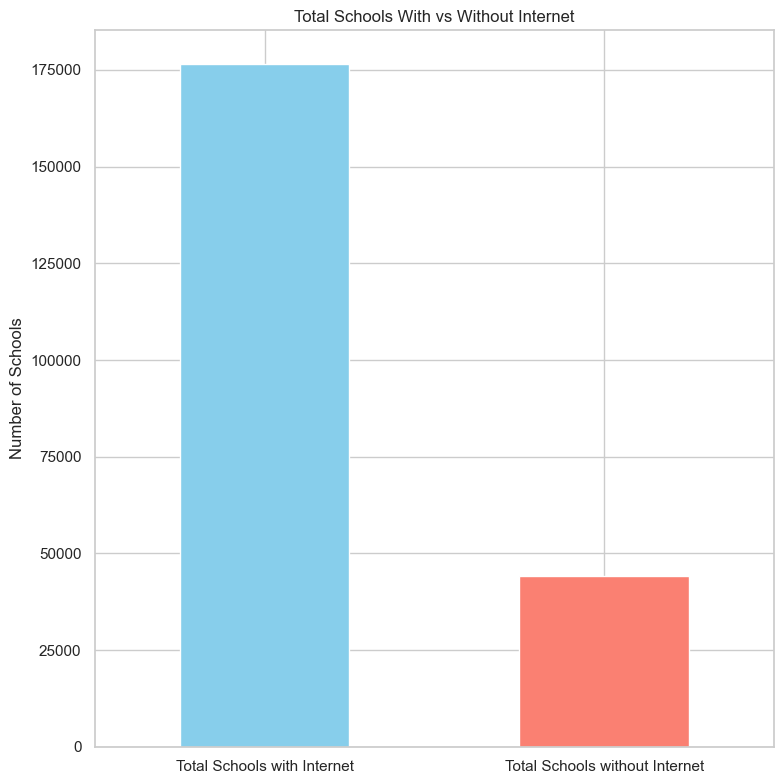

Average schools without internet (%): 19.92087292697908


In [ ]:
# Plot: Total schools with vs. without internet
plt.figure(figsize=(8, 8))
df[['Total Schools with Internet', 'Total Schools without Internet']].sum().plot(
    kind='bar', color=['skyblue', 'salmon'])
plt.title("Total Schools With vs Without Internet")
plt.ylabel("Number of Schools")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

avg_without_internet = (
    df['Total Schools without Internet'].sum() / df['Total Schools'].sum()
    ) * 100

print("Average schools without internet (%):", avg_without_internet)

### Provinces with the lowest number of schools with internet


            Province  Total Schools with Internet
26  Papua Pegunungan                          205
28      Papua Tengah                          344
27     Papua Selatan                          351
24       Papua Barat                          444
15  Kalimantan Utara                          485


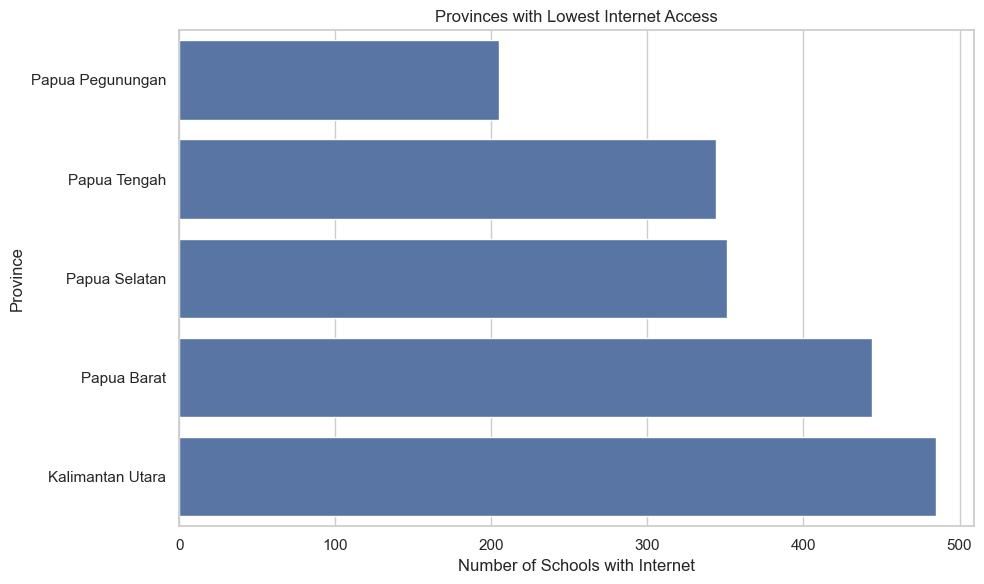

In [97]:
# Group by Province and sum the internet counts
province_internet = df.groupby('Province')['Total Schools with Internet'].sum().reset_index()

# Get the bottom 5 provinces with the lowest internet access
lowest_provinces = province_internet.sort_values(by='Total Schools with Internet').head(5)

print(lowest_provinces)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_provinces,
            x='Total Schools with Internet',
            y='Province')

plt.title("Provinces with Lowest Internet Access")
plt.xlabel("Number of Schools with Internet")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

### Internet access by school ownership type

Private-owned schools have less internet access than state-owned schools

               Internet Access
Private-owned            49289
State-owned             128019


<Figure size 800x600 with 0 Axes>

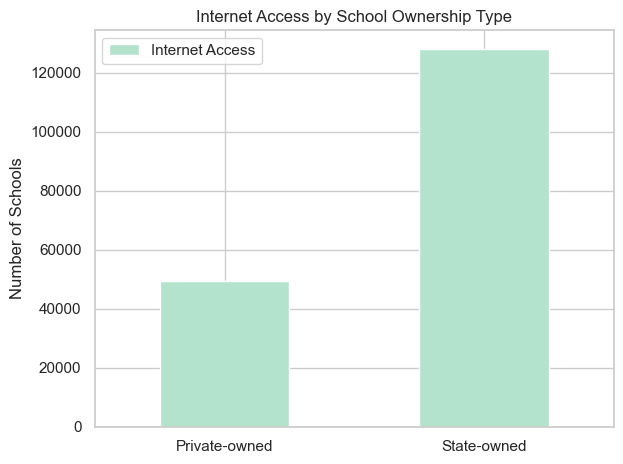

In [114]:
ownership_types = {
    'State-owned': df['State-owned School with Internet'].sum(),
    'Private-owned': df['Private-owned School with Internet'].sum()
}

ownership_df = pd.DataFrame.from_dict(ownership_types, orient='index', columns=['Internet Access']).sort_values('Internet Access')
print(ownership_df)

plt.figure(figsize=(8, 6))
ownership_df.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title("Internet Access by School Ownership Type")
plt.ylabel("Number of Schools")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

               With Internet  Without Internet
State-owned           128019             36821
Private-owned          49289              7287


<Figure size 800x600 with 0 Axes>

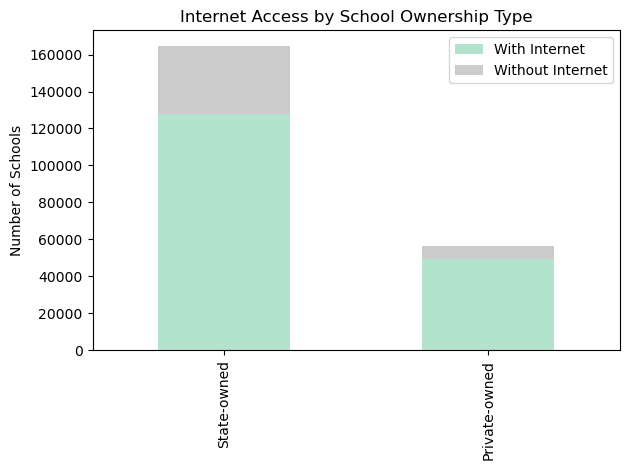

In [6]:
# Plot 2: Internet access by school ownership type
ownership_data = {
    'With Internet': [
        df['State-owned School with Internet'].sum(),
        df['Private-owned School with Internet'].sum()
    ],
    'Without Internet': [
        df['State-owned School without Internet'].sum(),
        df['Private-owned School without Internet'].sum()
    ]
}
ownership_df = pd.DataFrame(ownership_data, index=['State-owned', 'Private-owned'])
print(ownership_df)

plt.figure(figsize=(8, 6))
ownership_df.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title("Internet Access by School Ownership Type")
plt.ylabel("Number of Schools")

plt.tight_layout()
plt.show()

### Average internet access Ownership type

Average State-owned Internet Access (%): 77.66258189759768

Average Private-owned Internet Access (%): 89.76161424851122

In [6]:
# Calculate internet access rate columns
avg_state_with_internet = (df['State-owned School with Internet'].sum() / df['Total State-owned Schools'].sum()) * 100
avg_private_with_internet = (df['Private-owned School with Internet'].sum() / df['Total Private-owned Schools'].sum()) * 100
print("Average State-owned Internet Access (%):", avg_state_with_internet)
print("Average Private-owned Internet Access (%):", avg_private_with_internet)

Average State-owned Internet Access (%): 77.66258189759768
Average Private-owned Internet Access (%): 89.76161424851122


### Internet access by education levels

Special needs schools have the poorest internet access

Education Level
Elementary School         115260
Middle School              35093
High School                12748
Vocational High School     11215
Special Needs School        2092
Name: Total Schools with Internet, dtype: int64


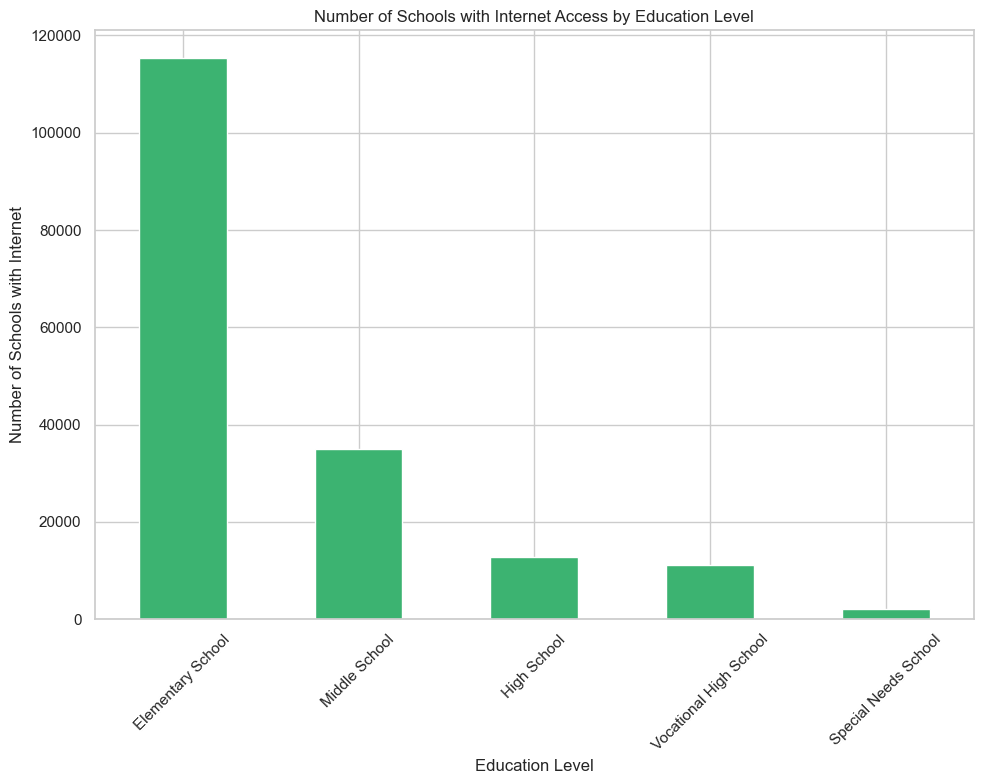

In [117]:
# Plot 1: Internet access by education levels

plt.figure(figsize=(10, 8))
education_level_sum = df.groupby('Education Level')['Total Schools with Internet'].sum().sort_values(ascending=False)

print(education_level_sum)

education_level_sum.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("Number of Schools with Internet Access by Education Level")
plt.ylabel("Number of Schools with Internet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comparative Analysis

### Distribution of schools with internet by island

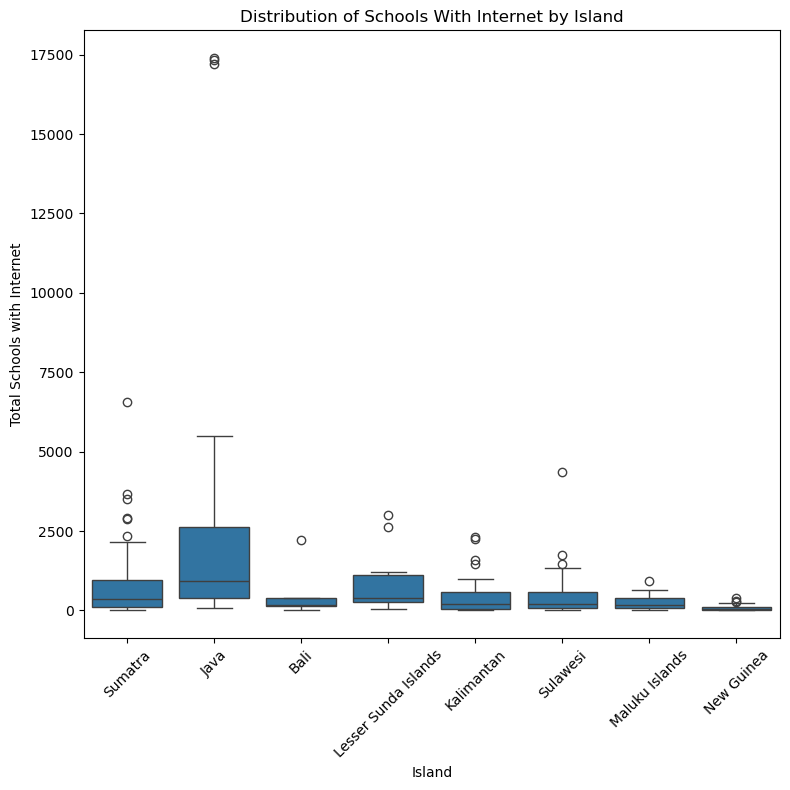

In [15]:
# Plot 3: Boxplot - distribution of schools with internet by island
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='Island', y='Total Schools with Internet')
plt.title("Distribution of Schools With Internet by Island")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 provinces by average internet-connected schools

Schools in Jawa Barat Province have the highest internet access

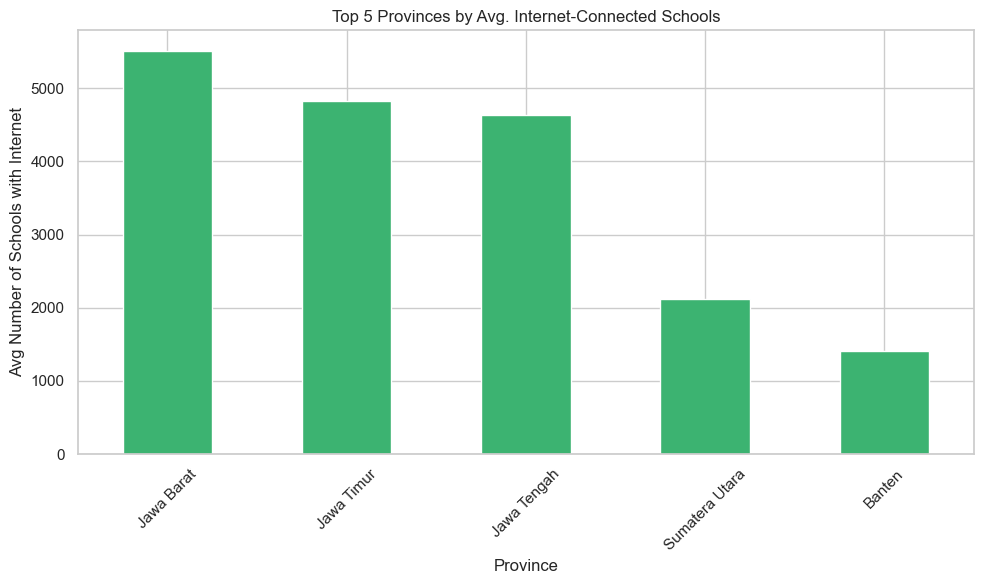

In [60]:
# Plot 4: Top 5 provinces by average internet-connected schools

province_avg = df.groupby('Province')['Total Schools with Internet'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
province_avg.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("Top 5 Provinces by Avg. Internet-Connected Schools")
plt.ylabel("Avg Number of Schools with Internet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Percentage of schools with internet access (relative to total schools per province)

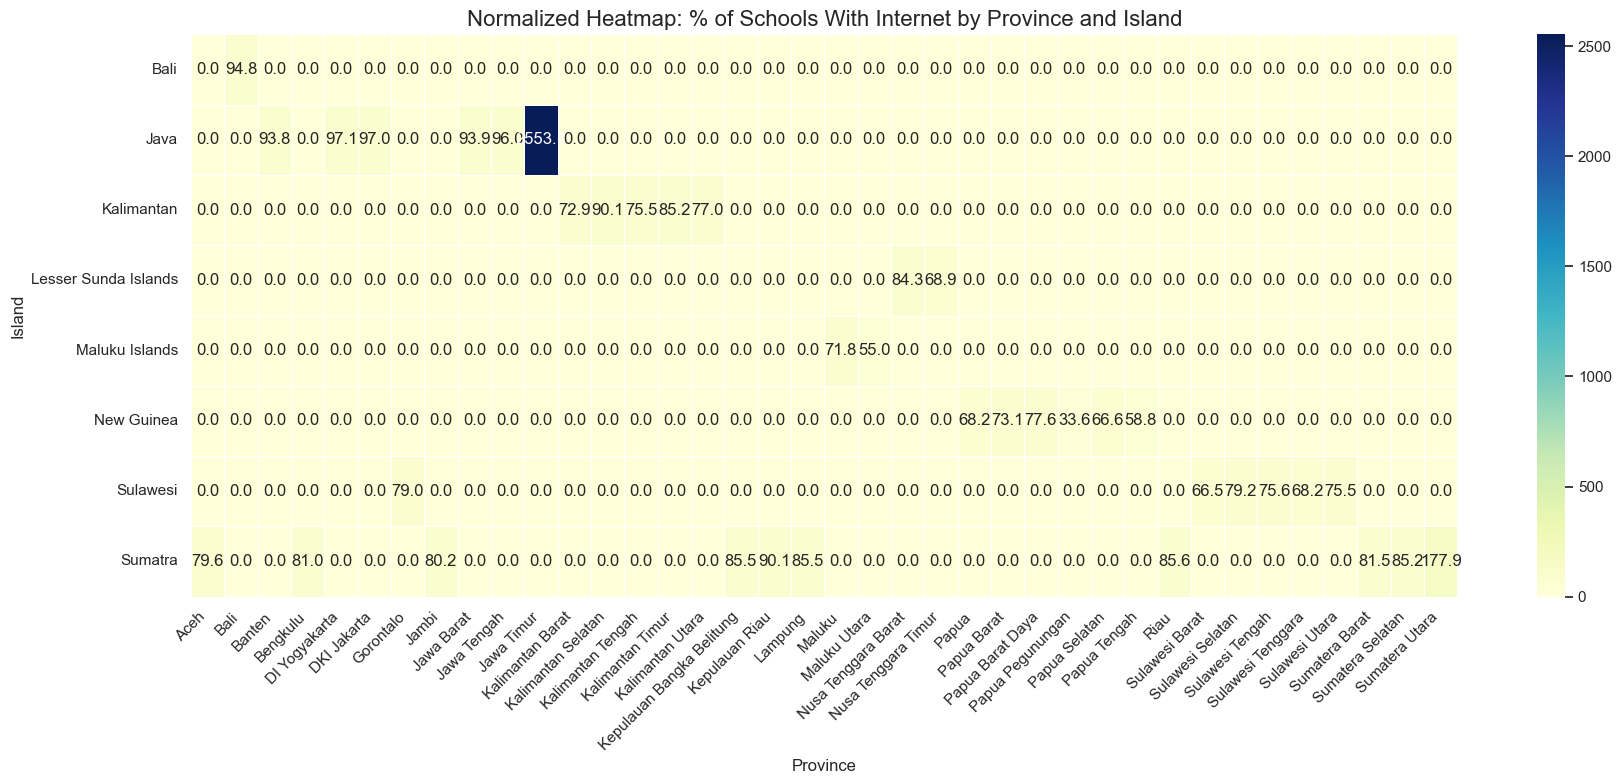

In [16]:
# Calculate percentage of schools with internet
df['Percent schools with internet'] = (
    df['Total number of schools with internet'] / df['Total number of all schools']
) * 100

# Prepare normalized heatmap data
normalized_data = df.groupby(['Island', 'Province'])['Percent schools with internet'].mean().unstack().fillna(0)

# Plot the normalized heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(normalized_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Normalized Heatmap: % of Schools With Internet by Province and Island", fontsize=16)
plt.xlabel("Province")
plt.ylabel("Island")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Regression Analysis

### Logistic Regression

Logistic regression is used in this case because the core business question involves predicting a binary outcome: whether a school has internet access or not. It provides clear coefficients showing how each feature (like province, ownership) affects the odds of having internet access. It works well with categorical data. It’s a strong model when false positives are costly.

From the confusion matrix: 
- Only 2 out of 4 schools without internet were correctly predicted.
- 17 schools *with* internet were incorrectly predicted as *no internet*.

Precision (positive predict value):
- For class 0 (schools with no internet): Only 11% of the schools the model predicted as "no internet" actually had no internet — lots of false positives.​
- For class 1 (schools with internet): 95% of the "has internet" predictions were correct — low false positives.

Recall (sesitivity):
- For class 0 (schools with no internet): Caught 50% of actual no-internet schools (2 out of 4).​
- For class 1 (schools with internet): Caught 68% of internet-access schools, missing 32%.

F1-Score (Harmonic mean of precision and recall): It is useful for balance between precision and recall.
- For class 0: 0.17 is very low, meaning the model is unreliable at identifying underserved schools. It either rarely predicts class 0 or gets it wrong when it does.​
- For class 1: 0.79 shows the model is strong for schools with internet access.




Best choice is Recall for class 0 to identify schools lacking internet so improvement actions can be targeted.​ Precision is less critical here — false positives (mistakenly flagging an internet-connected school) are less harmful than false negatives (missing an unconnected one).

Overall accuracy (67%) is misleading due to class imbalance.
The model is good at finding schools with internet but still struggles with identifying schools without it — the more critical case.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Drop rows with missing or non-numeric total values
df = df.dropna(subset=[
    'Total Schools with Internet',
    'Total Schools without Internet',
    'Education Level',
    'Province'
])

# Create binary target: 1 if majority of schools in row have internet, 0 otherwise
df['Total Schools with Internet'] = pd.to_numeric(df['Total Schools with Internet'], errors='coerce')
df['Total Schools'] = pd.to_numeric(df['Total Schools'], errors='coerce')
df = df.dropna(subset=['Total Schools', 'Total Schools with Internet'])

df['Internet_Access'] = (df['Total Schools with Internet'] / df['Total Schools'] >= 0.5).astype(int)


# Encode categorical variables
label_enc = LabelEncoder()
df['Ownership'] = df['Education Level'].apply(lambda x: 'State' if 'State' in str(x) else 'Private')
df['Ownership'] = label_enc.fit_transform(df['Ownership'])
df['Province'] = label_enc.fit_transform(df['Province'])
df['Education Level'] = label_enc.fit_transform(df['Education Level'])

# Define features and target
X = df[['Ownership', 'Province', 'Education Level']]
y = df['Internet_Access']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[ 2  2]
 [17 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.50      0.17         4
           1       0.95      0.68      0.79        53

    accuracy                           0.67        57
   macro avg       0.53      0.59      0.48        57
weighted avg       0.89      0.67      0.75        57

